# Introduction au Machine Learning avec Scikit-Learn

Ce notebook couvre les bases du Machine Learning
Nous allons apprendre :
1. L'installation et la configuration
2. Le pré-processing des données
3. Les concepts d'entraînement et de test
4. La régression linéaire
5. L'algorithme des k-plus proches voisins (KNN)
6. Le K-means pour le clustering (non supervisé)

# ============================================================================
# PARTIE 1 : INSTALLATION ET DÉPENDANCES
# ============================================================================

## Installation des bibliothèques nécessaires

Pour ce cours, nous aurons besoin des bibliothèques suivantes :

- **numpy** : pour les calculs numériques
- **pandas** : pour la manipulation de données
- **matplotlib** : pour la visualisation
- **scikit-learn** : notre bibliothèque principale de ML

### Installation (à exécuter dans votre terminal ou invite de commande) :

```bash
pip install numpy pandas matplotlib scikit-learn
```

Ou si vous utilisez Anaconda/Miniconda :

```bash
conda install numpy pandas matplotlib scikit-learn
```

Ou avec uv pip :

```bash 
uv pip install numpy pandas matplotlib scikit-learn
```

In [1]:
import sys
import platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

print("Python:", sys.version.split()[0])
print("Platform:", platform.platform())
print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("Scikit-learn:", sklearn.__version__)
print("\nToutes les bibliothèques sont installées correctement !")

Python: 3.11.14
Platform: macOS-26.2-arm64-arm-64bit
NumPy: 2.4.2
Pandas: 3.0.0
Scikit-learn: 1.8.0

Toutes les bibliothèques sont installées correctement !


# ============================================================================
# PARTIE 2 : QU'EST-CE QUE LE MACHINE LEARNING ?
# ============================================================================

## Définition du Machine Learning

Le Machine Learning (Apprentissage Automatique) est une branche de l'intelligence 
artificielle qui permet aux ordinateurs d'apprendre à partir de données, sans être 
explicitement programmés pour chaque tâche.

### Les types d'apprentissage :

1. **Supervisé** : On donne des exemples avec leurs réponses (étiquettes)
   - Exemple : prédire le prix d'une maison à partir de ses caractéristiques
   
2. **Non supervisé** : On donne uniquement des données, sans réponses
   - Exemple : regrouper des clients similaires
   
3. **Par renforcement** : L'algorithme apprend par essais-erreurs
   - Exemple : un robot qui apprend à marcher

Dans ce cours, nous nous concentrerons sur l'apprentissage **supervisé**.

### Les types de taches :

1. **Régression** : 
   prédire une valeur continue (ex: prix, température)

2. **Classification** : 
   prédire une catégorie (ex: spam ou non spam)

3. **Clustering** : 
   regrouper des données similaires (ex: segmentation de clients)

# ============================================================================
# PARTIE 3 : CHARGEMENT ET EXPLORATION DES DONNÉES
# ============================================================================

## Chargement d'un jeu de données

Nous allons utiliser un jeu de données classique : le dataset Iris
(classification de fleurs) et le dataset California Housing (régression).


In [2]:
from sklearn.datasets import load_iris, fetch_california_housing

# Chargement du dataset Iris pour la classification
iris = load_iris()
print("=== Dataset Iris (Classification) ===")
print("Nombre d'échantillons:", iris.data.shape[0])
print("Nombre de caractéristiques:", iris.data.shape[1])
print("Classes à prédire:", iris.target_names)
print()

# Chargement du dataset California Housing pour la régression
housing = fetch_california_housing()
print("=== Dataset California Housing (Régression) ===")
print("Nombre d'échantillons:", housing.data.shape[0])
print("Nombre de caractéristiques:", housing.data.shape[1])
print("Variable à prédire: Prix médian des maisons")

# Création d'un DataFrame pour mieux visualiser les données
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['espèce'] = iris.target
print("\n=== Aperçu des données Iris ===")
print(df_iris.head())

=== Dataset Iris (Classification) ===
Nombre d'échantillons: 150
Nombre de caractéristiques: 4
Classes à prédire: ['setosa' 'versicolor' 'virginica']

=== Dataset California Housing (Régression) ===
Nombre d'échantillons: 20640
Nombre de caractéristiques: 8
Variable à prédire: Prix médian des maisons

=== Aperçu des données Iris ===
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   espèce  
0       0  
1       0  
2       0  
3       0  
4       0  


# ============================================================================
# PARTIE 4 : PRÉ-PROCESSING DES DONNÉES
# ============================================================================

## Le Pré-Processing : Préparer les données pour l'apprentissage

Le pré-processing est une étape CRUCIALE en Machine Learning.
Des données mal préparées = modèle qui fonctionne mal !

### Principales étapes du pré-processing :
1. Gestion des valeurs manquantes
2. Normalisation/Standardisation
3. Encodage des variables catégorielles
4. Division des données (train/test)

=== Statistiques descriptives ===
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      espèce  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  

=== Valeurs manquantes ===
Nombre de 

/var/folders/f1/8w6qz3t128b0gm8r3m8qxyzw0000gn/T/ipykernel_71656/814637729.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 0].boxplot([df_iris[df_iris['espèce']==i]['petal length (cm)'] for i in range(3)],


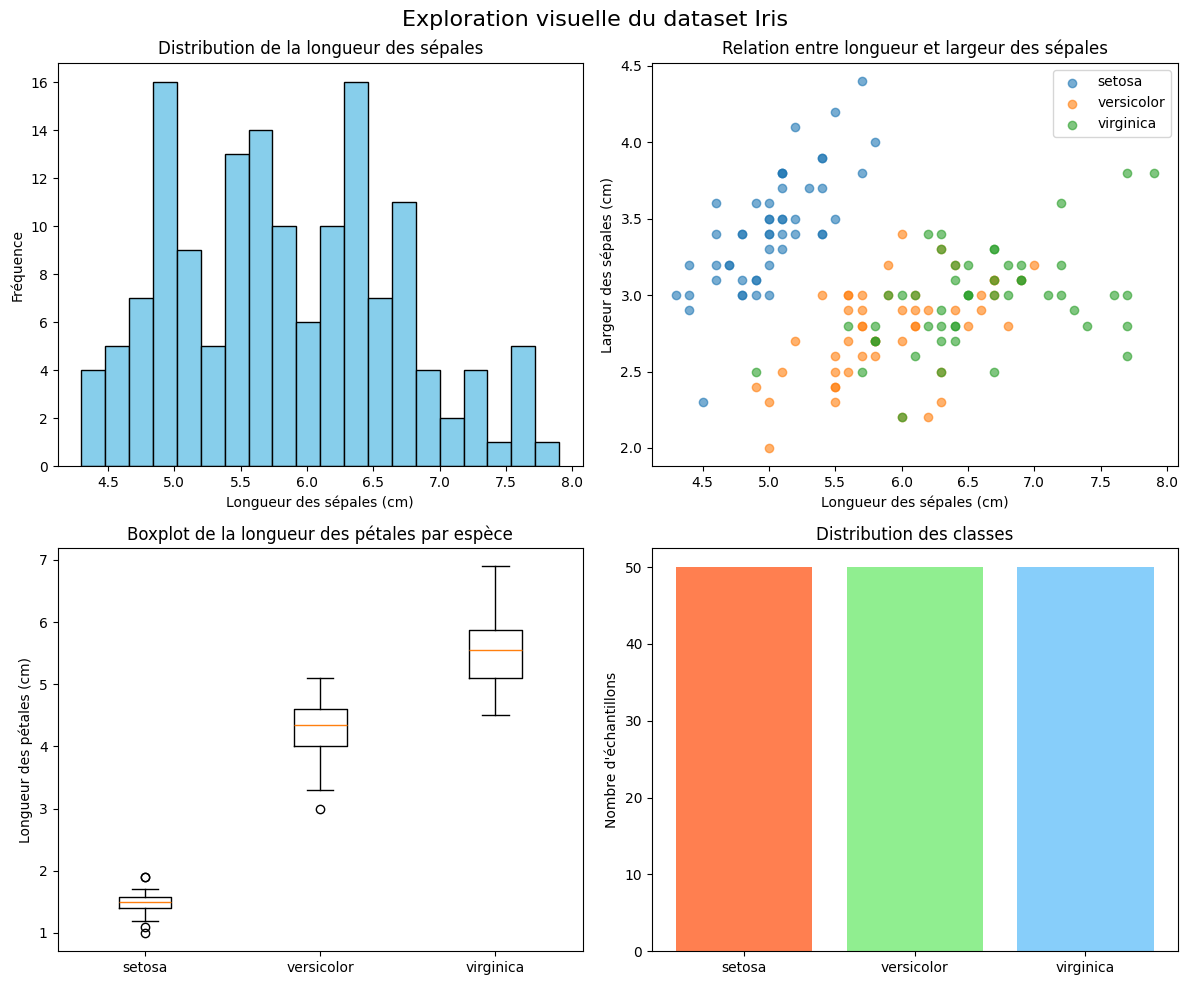

In [5]:
# --- 4.1 : Statistiques descriptives ---
print("=== Statistiques descriptives ===")
print(df_iris.describe())

# --- 4.2 : Vérification des valeurs manquantes ---
print("\n=== Valeurs manquantes ===")
print("Nombre de valeurs manquantes par colonne:")
print(df_iris.isnull().sum())
print("✓ Pas de valeurs manquantes dans ce dataset !")

# --- 4.3 : Visualisation des données ---
print("\n=== Visualisation des données ===")

# Créer une figure avec plusieurs graphiques
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Exploration visuelle du dataset Iris', fontsize=16)

# Histogramme de la longueur des sépales
axes[0, 0].hist(df_iris['sepal length (cm)'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Longueur des sépales (cm)')
axes[0, 0].set_ylabel('Fréquence')
axes[0, 0].set_title('Distribution de la longueur des sépales')

# Nuage de points
for espece in range(3):
    mask = df_iris['espèce'] == espece
    axes[0, 1].scatter(df_iris[mask]['sepal length (cm)'], 
                       df_iris[mask]['sepal width (cm)'],
                       label=iris.target_names[espece],
                       alpha=0.6)
axes[0, 1].set_xlabel('Longueur des sépales (cm)')
axes[0, 1].set_ylabel('Largeur des sépales (cm)')
axes[0, 1].set_title('Relation entre longueur et largeur des sépales')
axes[0, 1].legend()

# Boxplot pour détecter les valeurs aberrantes
axes[1, 0].boxplot([df_iris[df_iris['espèce']==i]['petal length (cm)'] for i in range(3)],
                    labels=iris.target_names)
axes[1, 0].set_ylabel('Longueur des pétales (cm)')
axes[1, 0].set_title('Boxplot de la longueur des pétales par espèce')

# Distribution des classes
axes[1, 1].bar(iris.target_names, [sum(df_iris['espèce']==i) for i in range(3)],
               color=['coral', 'lightgreen', 'lightskyblue'])
axes[1, 1].set_ylabel('Nombre d\'échantillons')
axes[1, 1].set_title('Distribution des classes')

plt.tight_layout()
plt.show()


In [11]:
# --- 4.4 : Standardisation des données ---
from sklearn.preprocessing import StandardScaler

print("\n=== Standardisation des données ===")
print("""
La standardisation transforme les données pour avoir :
- Une moyenne de 0
- Un écart-type de 1

Formule : z = (x - moyenne) / écart-type

Pourquoi ? Certains algorithmes sont sensibles à l'échelle des données.
""")

# Exemple de standardisation
scaler = StandardScaler()
X_original = housing.data[:5, :2]  # Prenons juste 5 lignes et 2 colonnes
X_scaled = scaler.fit_transform(X_original)

print("Données AVANT standardisation:")
print(X_original)
print("\nDonnées APRÈS standardisation:")
print(X_scaled)
print("\nVérification - Moyenne des colonnes:", X_scaled.mean(axis=0))
print("Vérification - Écart-type des colonnes:", X_scaled.std(axis=0))


=== Standardisation des données ===

La standardisation transforme les données pour avoir :
- Une moyenne de 0
- Un écart-type de 1

Formule : z = (x - moyenne) / écart-type

Pourquoi ? Certains algorithmes sont sensibles à l'échelle des données.

Données AVANT standardisation:
[[ 8.3252 41.    ]
 [ 8.3014 21.    ]
 [ 7.2574 52.    ]
 [ 5.6431 52.    ]
 [ 3.8462 52.    ]]

Données APRÈS standardisation:
[[ 0.96018595 -0.21529553]
 [ 0.94634053 -1.87141502]
 [ 0.33900345  0.69557019]
 [-0.60010022  0.69557019]
 [-1.64542971  0.69557019]]

Vérification - Moyenne des colonnes: [-2.66453526e-16 -1.33226763e-16]
Vérification - Écart-type des colonnes: [1. 1.]


In [ ]:
# --- 4.5 : Division Train/Test ---
from sklearn.model_selection import train_test_split

print("\n=== Division des données en ensembles d'entraînement et de test ===")
print("""
Principe fondamental du ML : 
- On ENTRAÎNE le modèle sur une partie des données (Train)
- On ÉVALUE le modèle sur des données qu'il n'a JAMAIS vues (Test)

Ratio typique : 80% train / 20% test
""")

# Division pour le dataset Iris
X_iris = iris.data
y_iris = iris.target

X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, 
    test_size=0.2,      # 20% pour le test
    random_state=42,    # Pour la reproductibilité
    stratify=y_iris     # Garde la même proportion de classes
)

print(f"Taille du dataset complet: {len(X_iris)}")
print(f"Taille de l'ensemble d'entraînement: {len(X_train_iris)}")
print(f"Taille de l'ensemble de test: {len(X_test_iris)}")


=== Division des données en ensembles d'entraînement et de test ===

Principe fondamental du ML : 
- On ENTRAÎNE le modèle sur une partie des données (Train)
- On ÉVALUE le modèle sur des données qu'il n'a JAMAIS vues (Test)

Ratio typique : 80% train / 20% test

Taille du dataset complet: 150
Taille de l'ensemble d'entraînement: 120
Taille de l'ensemble de test: 30


# ============================================================================
# PARTIE 5 : RÉGRESSION LINÉAIRE
# ============================================================================

## La Régression Linéaire

La régression linéaire est l'un des algorithmes les plus simples du ML.
Elle cherche à prédire une valeur numérique continue.

### Principe :
Trouver la "meilleure" droite qui passe au plus près de tous les points.

Équation : y = a*x + b
- y : valeur à prédire
- x : caractéristique(s) en entrée
- a : pente (coefficient)
- b : ordonnée à l'origine (intercept)


=== RÉGRESSION LINÉAIRE : Prédiction du prix des maisons ===

ÉTAPE 1 : Création et entraînement du modèle
✓ Modèle entraîné !

ÉTAPE 2 : Faire des prédictions

Exemples de prédictions (en centaines de milliers de $) :
  Valeur réelle: 0.48 | Prédiction: 0.72
  Valeur réelle: 0.46 | Prédiction: 1.76
  Valeur réelle: 5.00 | Prédiction: 2.71
  Valeur réelle: 2.19 | Prédiction: 2.84
  Valeur réelle: 2.78 | Prédiction: 2.60

ÉTAPE 3 : Évaluation de la performance

Performance sur les données d'ENTRAÎNEMENT :
  - MSE  : 0.5179
  - R²   : 0.6126

Performance sur les données de TEST :
  - MSE  : 0.5559
  - R²   : 0.5758

Interprétation du R² :
- R² = 57.58% signifie que le modèle explique 57.58% de la variance des prix.
- Plus R² est proche de 100%, meilleur est le modèle.



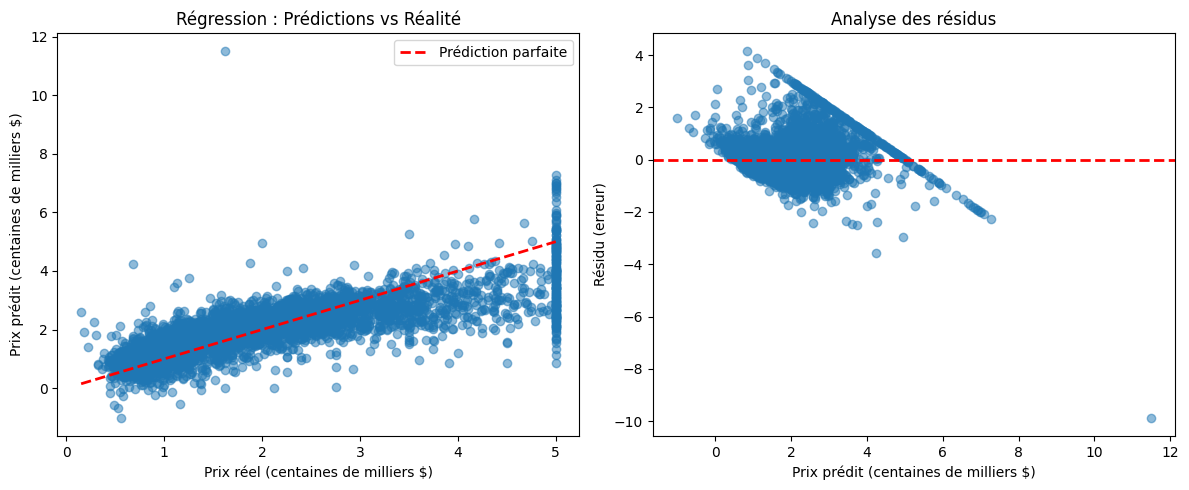

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("=== RÉGRESSION LINÉAIRE : Prédiction du prix des maisons ===\n")

# Préparation des données
X_housing = housing.data
y_housing = housing.target

# Division train/test
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_housing, y_housing, test_size=0.2, random_state=42
)

# Standardisation (important pour la régression)
scaler_reg = StandardScaler()
X_train_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_scaled = scaler_reg.transform(X_test_reg)

# --- 5.1 : Entraînement du modèle ---
print("ÉTAPE 1 : Création et entraînement du modèle")
model_reg = LinearRegression()
model_reg.fit(X_train_scaled, y_train_reg)
print("✓ Modèle entraîné !")

# --- 5.2 : Prédictions ---
print("\nÉTAPE 2 : Faire des prédictions")
y_pred_train = model_reg.predict(X_train_scaled)
y_pred_test = model_reg.predict(X_test_scaled)

# Affichage de quelques prédictions
print("\nExemples de prédictions (en centaines de milliers de $) :")
for i in range(5):
    print(f"  Valeur réelle: {y_test_reg[i]:.2f} | Prédiction: {y_pred_test[i]:.2f}")

# --- 5.3 : Évaluation du modèle ---
print("\nÉTAPE 3 : Évaluation de la performance")

# Erreur quadratique moyenne (MSE)
mse_train = mean_squared_error(y_train_reg, y_pred_train)
mse_test = mean_squared_error(y_test_reg, y_pred_test)

# Coefficient de détermination (R²) : de 0 à 1, plus c'est proche de 1, mieux c'est
r2_train = r2_score(y_train_reg, y_pred_train)
r2_test = r2_score(y_test_reg, y_pred_test)

print(f"\nPerformance sur les données d'ENTRAÎNEMENT :")
print(f"  - MSE  : {mse_train:.4f}")
print(f"  - R²   : {r2_train:.4f}")

print(f"\nPerformance sur les données de TEST :")
print(f"  - MSE  : {mse_test:.4f}")
print(f"  - R²   : {r2_test:.4f}")

print(f"""
Interprétation du R² :
- R² = {r2_test:.2%} signifie que le modèle explique {r2_test:.2%} de la variance des prix.
- Plus R² est proche de 100%, meilleur est le modèle.
""")

# --- 5.4 : Visualisation des résultats ---
plt.figure(figsize=(12, 5))

# Graphique 1 : Valeurs réelles vs prédictions
plt.subplot(1, 2, 1)
plt.scatter(y_test_reg, y_pred_test, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], 
         [y_test_reg.min(), y_test_reg.max()], 
         'r--', lw=2, label='Prédiction parfaite')
plt.xlabel('Prix réel (centaines de milliers $)')
plt.ylabel('Prix prédit (centaines de milliers $)')
plt.title('Régression : Prédictions vs Réalité')
plt.legend()

# Graphique 2 : Résidus (erreurs)
plt.subplot(1, 2, 2)
residus = y_test_reg - y_pred_test
plt.scatter(y_pred_test, residus, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Prix prédit (centaines de milliers $)')
plt.ylabel('Résidu (erreur)')
plt.title('Analyse des résidus')
plt.tight_layout()
plt.show()


# ============================================================================
# PARTIE 6 : K-PLUS PROCHES VOISINS (KNN)
# ============================================================================

## L'algorithme des K-Plus Proches Voisins (KNN)

Le KNN est un algorithme simple et intuitif pour la classification.

### Principe :
"Dis-moi qui sont tes voisins, je te dirai qui tu es !"

Pour classifier un nouveau point :
1. On trouve les K points les plus proches dans les données d'entraînement
2. On regarde leur classe
3. On attribue la classe majoritaire

Exemple : Si K=5 et que 4 voisins sont des "setosa" et 1 est "versicolor",
          on classifie le point comme "setosa".


=== K-PLUS PROCHES VOISINS : Classification des Iris ===

ÉTAPE 1 : Création et entraînement du modèle KNN
Nous allons tester avec K=3 voisins

✓ Modèle KNN entraîné !

ÉTAPE 2 : Faire des prédictions

Exemples de prédictions :
  ✓ Vraie classe: setosa       | Prédiction: setosa
  ✓ Vraie classe: virginica    | Prédiction: virginica
  ✓ Vraie classe: versicolor   | Prédiction: versicolor
  ✓ Vraie classe: versicolor   | Prédiction: versicolor
  ✓ Vraie classe: setosa       | Prédiction: setosa

ÉTAPE 3 : Évaluation de la performance

Précision (Accuracy) : 93.33%
Le modèle a correctement classifié 93.33% des fleurs !

=== Matrice de confusion ===

La matrice de confusion montre :
- Lignes : classes réelles
- Colonnes : classes prédites
- Diagonale : prédictions correctes


           Prédit:
            setosa      versicolor  virginica 
Réel setosa             10           0           0
Réel versicolor          0          10           0
Réel virginica           0           2          

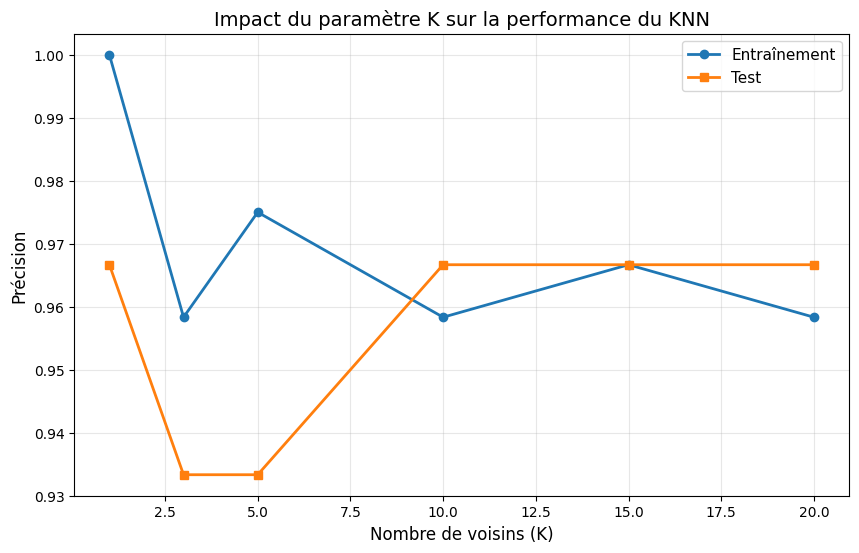


Observation importante :
- Si K est trop petit (K=1) : le modèle peut "sur-apprendre" (overfitting)
- Si K est trop grand : le modèle devient trop simpliste (underfitting)
- Il faut trouver un bon équilibre !


=== Visualisation des frontières de décision ===


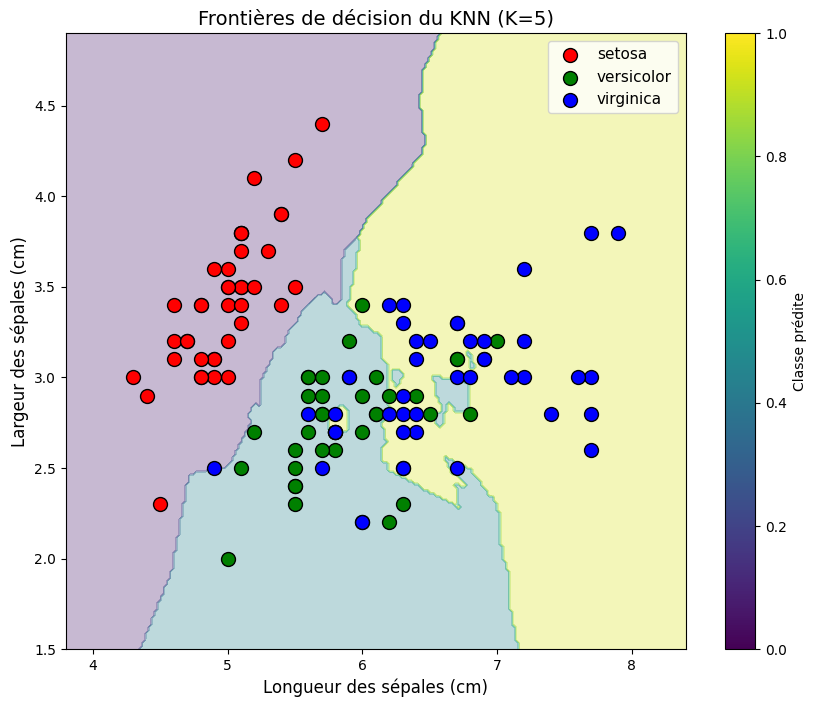

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("=== K-PLUS PROCHES VOISINS : Classification des Iris ===\n")

# Standardisation des données (important pour KNN car il utilise les distances)
scaler_knn = StandardScaler()
X_train_knn_scaled = scaler_knn.fit_transform(X_train_iris)
X_test_knn_scaled = scaler_knn.transform(X_test_iris)

# --- 6.1 : Entraînement du modèle ---
print("ÉTAPE 1 : Création et entraînement du modèle KNN")
print("Nous allons tester avec K=3 voisins\n")

model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train_knn_scaled, y_train_iris)
print("✓ Modèle KNN entraîné !")

# --- 6.2 : Prédictions ---
print("\nÉTAPE 2 : Faire des prédictions")
y_pred_knn = model_knn.predict(X_test_knn_scaled)

# Affichage de quelques prédictions
print("\nExemples de prédictions :")
for i in range(5):
    vrai = iris.target_names[y_test_iris[i]]
    pred = iris.target_names[y_pred_knn[i]]
    statut = "✓" if vrai == pred else "✗"
    print(f"  {statut} Vraie classe: {vrai:12s} | Prédiction: {pred}")

# --- 6.3 : Évaluation du modèle ---
print("\nÉTAPE 3 : Évaluation de la performance")

# Accuracy (précision globale)
accuracy = accuracy_score(y_test_iris, y_pred_knn)
print(f"\nPrécision (Accuracy) : {accuracy:.2%}")
print(f"Le modèle a correctement classifié {accuracy:.2%} des fleurs !")

# Matrice de confusion
print("\n=== Matrice de confusion ===")
print("""
La matrice de confusion montre :
- Lignes : classes réelles
- Colonnes : classes prédites
- Diagonale : prédictions correctes
""")

cm = confusion_matrix(y_test_iris, y_pred_knn)
print("\n           Prédit:")
print("           ", "  ".join(f"{name:10s}" for name in iris.target_names))
for i, nom_classe in enumerate(iris.target_names):
    print(f"Réel {nom_classe:10s}", "  ".join(f"{val:10d}" for val in cm[i]))

# Rapport de classification détaillé
print("\n=== Rapport de classification ===")
print(classification_report(y_test_iris, y_pred_knn, target_names=iris.target_names))

# --- 6.4 : Impact du paramètre K ---
print("\n=== Effet du nombre de voisins K ===")
print("Testons différentes valeurs de K...\n")

k_values = [1, 3, 5, 10, 15, 20]
accuracies_train = []
accuracies_test = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_knn_scaled, y_train_iris)
    
    acc_train = knn.score(X_train_knn_scaled, y_train_iris)
    acc_test = knn.score(X_test_knn_scaled, y_test_iris)
    
    accuracies_train.append(acc_train)
    accuracies_test.append(acc_test)
    
    print(f"K={k:2d} | Train: {acc_train:.2%} | Test: {acc_test:.2%}")

# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies_train, 'o-', label='Entraînement', linewidth=2)
plt.plot(k_values, accuracies_test, 's-', label='Test', linewidth=2)
plt.xlabel('Nombre de voisins (K)', fontsize=12)
plt.ylabel('Précision', fontsize=12)
plt.title('Impact du paramètre K sur la performance du KNN', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.show()

print("""
Observation importante :
- Si K est trop petit (K=1) : le modèle peut "sur-apprendre" (overfitting)
- Si K est trop grand : le modèle devient trop simpliste (underfitting)
- Il faut trouver un bon équilibre !
""")

# --- 6.5 : Visualisation des frontières de décision ---
print("\n=== Visualisation des frontières de décision ===")

# Pour simplifier, utilisons seulement 2 caractéristiques
X_simple = X_train_iris[:, :2]  # Longueur et largeur des sépales
X_test_simple = X_test_iris[:, :2]

# Entraînement sur ces 2 caractéristiques
knn_simple = KNeighborsClassifier(n_neighbors=5)
knn_simple.fit(X_simple, y_train_iris)

# Création d'une grille pour visualiser les frontières
x_min, x_max = X_simple[:, 0].min() - 0.5, X_simple[:, 0].max() + 0.5
y_min, y_max = X_simple[:, 1].min() - 0.5, X_simple[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))

# Prédiction pour chaque point de la grille
Z = knn_simple.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualisation
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Affichage des points d'entraînement
colors = ['red', 'green', 'blue']
for i, nom in enumerate(iris.target_names):
    mask = y_train_iris == i
    plt.scatter(X_simple[mask, 0], X_simple[mask, 1], 
                c=colors[i], label=nom, edgecolor='black', s=100)

plt.xlabel('Longueur des sépales (cm)', fontsize=12)
plt.ylabel('Largeur des sépales (cm)', fontsize=12)
plt.title('Frontières de décision du KNN (K=5)', fontsize=14)
plt.legend(fontsize=11)
plt.colorbar(label='Classe prédite')
plt.show()

# ============================================================================
# PARTIE 7 : COMPARAISON ET BONNES PRATIQUES
# ============================================================================


In [9]:
print("\n" + "="*80)
print("RÉCAPITULATIF ET BONNES PRATIQUES")
print("="*80)

print("""
### Comparaison Régression vs Classification :

| Aspect              | Régression Linéaire        | KNN Classification      |
|---------------------|----------------------------|-------------------------|
| Type de problème    | Prédiction de valeurs      | Prédiction de classes   |
| Output              | Nombre continu             | Catégorie discrète      |
| Exemple             | Prix, température          | Espèce, diagnostic      |
| Métrique            | MSE, R²                    | Accuracy, F1-score      |

### Les 10 Commandements du Machine Learning pour débutants :

1. **Toujours diviser tes données** en train et test tu devras
2. **Ne jamais toucher aux données de test** avant l'évaluation finale
3. **Standardiser tes données** quand nécessaire (KNN, régression)
4. **Visualiser tes données** avant de modéliser
5. **Commencer simple** (régression linéaire, KNN) avant les modèles complexes
6. **Surveiller l'overfitting** : si les performances train >> test, attention !
7. **Choisir les bonnes métriques** selon ton problème
8. **Tester différents paramètres** (comme K dans KNN)
9. **Comprendre ton modèle** avant de l'utiliser en production
10. **Itérer et améliorer** : le ML est un processus itératif et empirique !
""")


RÉCAPITULATIF ET BONNES PRATIQUES

### Comparaison Régression vs Classification :

| Aspect              | Régression Linéaire        | KNN Classification      |
|---------------------|----------------------------|-------------------------|
| Type de problème    | Prédiction de valeurs      | Prédiction de classes   |
| Output              | Nombre continu             | Catégorie discrète      |
| Exemple             | Prix, température          | Espèce, diagnostic      |
| Métrique            | MSE, R²                    | Accuracy, F1-score      |

### Les 10 Commandements du Machine Learning pour débutants :

1. **Toujours diviser tes données** en train et test tu devras
2. **Ne jamais toucher aux données de test** avant l'évaluation finale
3. **Standardiser tes données** quand nécessaire (KNN, régression)
4. **Visualiser tes données** avant de modéliser
5. **Commencer simple** (régression linéaire, KNN) avant les modèles complexes
6. **Surveiller l'overfitting** : si les performa

# ============================================================================
# PARTIE 8 : EXERCICE PRATIQUE GUIDÉ
# ============================================================================


In [16]:
## V1
print("\n" + "="*80)
print("EXERCICE PRATIQUE V1 : À VOTRE TOUR !")
print("="*80)

print("""
### Exercice : Prédire si un vin est rouge ou blanc

Voici un mini-exercice pour pratiquer ce que vous avez appris !

Étapes à suivre :
1. Créer un dataset synthétique de vins
2. Le diviser en train/test
3. Standardiser les données
4. Entraîner un modèle KNN
5. Évaluer sa performance

Essayez de le faire seul, puis regardez la solution ci-dessous !
""")


EXERCICE PRATIQUE V1 : À VOTRE TOUR !

### Exercice : Prédire si un vin est rouge ou blanc

Voici un mini-exercice pour pratiquer ce que vous avez appris !

Étapes à suivre :
1. Créer un dataset synthétique de vins
2. Le diviser en train/test
3. Standardiser les données
4. Entraîner un modèle KNN
5. Évaluer sa performance

Essayez de le faire seul, puis regardez la solution ci-dessous !



In [15]:
## V2

print("\n" + "="*80)
print("EXERCICE PRATIQUE : CLASSIFICATION VIN ROUGE / VIN BLANC - V2")
print("="*80)

print("""
Objectif :
Construire un modèle KNN capable de prédire si un vin est rouge (1) ou blanc (0)
à partir de ses caractéristiques chimiques.

Vous devez :

1. Générer un dataset synthétique réaliste
2. Diviser en train/test (avec stratify)
3. Entraîner un KNN sans scaling
4. Puis avec scaling
5. Comparer les performances
6. Trouver le meilleur k
7. Afficher la matrice de confusion

Essayez d'abord seul. La correction est plus bas 👇
""")



EXERCICE PRATIQUE : CLASSIFICATION VIN ROUGE / VIN BLANC - V2

Objectif :
Construire un modèle KNN capable de prédire si un vin est rouge (1) ou blanc (0)
à partir de ses caractéristiques chimiques.

Vous devez :

1. Générer un dataset synthétique réaliste
2. Diviser en train/test (avec stratify)
3. Entraîner un KNN sans scaling
4. Puis avec scaling
5. Comparer les performances
6. Trouver le meilleur k
7. Afficher la matrice de confusion

Essayez d'abord seul. La correction est plus bas 👇



In [10]:
# Étape 1 : Création d'un dataset synthétique
from sklearn.datasets import make_classification

X_vin, y_vin = make_classification(
    n_samples=200,           # 200 vins
    n_features=4,            # 4 caractéristiques
    n_informative=3,         # 3 sont vraiment utiles
    n_redundant=1,           # 1 est redondante
    n_classes=2,             # 2 classes : rouge ou blanc
    random_state=42
)

print("Dataset créé : 200 vins avec 4 caractéristiques")
print(f"Forme des données : {X_vin.shape}")



Dataset créé : 200 vins avec 4 caractéristiques
Forme des données : (200, 4)


In [17]:
# Étape 1 (si on avait une regression): Création d'un dataset synthétique pour la régression

from sklearn.datasets import make_regression

X_maison, y_prix = make_regression(
    n_samples=200,        # 200 maisons
    n_features=4,         # 4 caractéristiques (ex: surface, nb pièces, âge, distance centre)
    n_informative=3,      # 3 variables réellement utiles
    noise=15,             # bruit ajouté (rend le problème réaliste)
    random_state=42
)

print("Dataset créé : 200 maisons avec 4 caractéristiques")
print(f"Forme des données : {X_maison.shape}")
print(f"Forme de la target : {y_prix.shape}")


Dataset créé : 200 maisons avec 4 caractéristiques
Forme des données : (200, 4)
Forme de la target : (200,)


# ============================================================================
# PARTIE 9 : K-MEANS CLUSTERING (APPRENTISSAGE NON SUPERVISÉ)
# ============================================================================

## L'algorithme K-Means : Regrouper sans étiquettes

Jusqu'à présent, nous avons fait de l'apprentissage SUPERVISÉ (on connaissait les réponses).
Maintenant, découvrons l'apprentissage NON SUPERVISÉ : on cherche des groupes naturels 
dans les données SANS connaître les catégories à l'avance !

### Principe du K-Means :
1. Choisir K (le nombre de groupes à former)
2. Placer K centres (centroïdes) au hasard
3. Assigner chaque point au centre le plus proche
4. Déplacer les centres au milieu de leurs points
5. Répéter les étapes 3-4 jusqu'à stabilisation

### Cas d'usage :
- Segmentation de clients (groupes de comportements similaires)
- Compression d'images (réduire le nombre de couleurs)
- Détection d'anomalies
- Organisation de documents


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

print("=== K-MEANS CLUSTERING : Découvrir des groupes naturels ===\n")

# --- 9.1 : Création d'un dataset pour le clustering ---
print("ÉTAPE 1 : Création d'un dataset synthétique avec des groupes naturels")

from sklearn.datasets import make_blobs

# Créons 300 points avec 4 groupes naturels
X_blobs, y_blobs_true = make_blobs(
    n_samples=300,
    centers=4,           # 4 groupes réels
    n_features=2,        # 2 dimensions pour pouvoir visualiser
    cluster_std=0.6,     # Dispersion des groupes
    random_state=42
)

print(f"Dataset créé : {len(X_blobs)} points en 2 dimensions")
print("Note : Nous connaissons les 'vrais' groupes, mais faisons comme si nous ne les connaissions pas !")

# Visualisation des données SANS les étiquettes
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], alpha=0.6, s=50)
plt.xlabel('Caractéristique 1', fontsize=11)
plt.ylabel('Caractéristique 2', fontsize=11)
plt.title('Données brutes (sans étiquettes)', fontsize=13)

plt.subplot(1, 2, 2)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs_true, 
            cmap='viridis', alpha=0.6, s=50, edgecolor='black')
plt.xlabel('Caractéristique 1', fontsize=11)
plt.ylabel('Caractéristique 2', fontsize=11)
plt.title('Groupes réels (que nous ne connaissons pas en pratique)', fontsize=13)
plt.colorbar(label='Groupe réel')
plt.tight_layout()
plt.show()

In [ ]:
# --- 9.2 : Application du K-Means ---
print("\nÉTAPE 2 : Application de l'algorithme K-Means avec K=4")

# Créer et entraîner le modèle K-Means
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_blobs)

# Récupération des centres (centroïdes)
centres = kmeans.cluster_centers_

print(f"✓ K-Means terminé !")
print(f"Nombre de points assignés à chaque cluster :")
for i in range(4):
    print(f"  Cluster {i} : {sum(y_kmeans == i)} points")

# Visualisation des résultats
plt.figure(figsize=(12, 5))

# Résultats du clustering
plt.subplot(1, 2, 1)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_kmeans, 
            cmap='viridis', alpha=0.6, s=50, edgecolor='black')
plt.scatter(centres[:, 0], centres[:, 1], 
            c='red', marker='X', s=300, edgecolor='black', linewidth=2,
            label='Centroïdes')
plt.xlabel('Caractéristique 1', fontsize=11)
plt.ylabel('Caractéristique 2', fontsize=11)
plt.title('Résultats du K-Means (K=4)', fontsize=13)
plt.legend()
plt.colorbar(label='Cluster assigné')

# Comparaison avec les vrais groupes
plt.subplot(1, 2, 2)
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=y_blobs_true, 
            cmap='viridis', alpha=0.6, s=50, edgecolor='black')
plt.xlabel('Caractéristique 1', fontsize=11)
plt.ylabel('Caractéristique 2', fontsize=11)
plt.title('Groupes réels (pour comparaison)', fontsize=13)
plt.colorbar(label='Groupe réel')
plt.tight_layout()
plt.show()

print("\n✓ Le K-Means a réussi à retrouver les groupes naturels !")

In [ ]:
# --- 9.3 : Comment choisir K ? La méthode du coude (Elbow Method) ---
print("\n" + "="*70)
print("ÉTAPE 3 : Comment choisir le bon nombre de clusters K ?")
print("="*70)

print("""
C'est LA grande question du K-Means : combien de groupes former ?

Méthode du coude (Elbow Method) :
- Calculer l'inertie (somme des distances au carré) pour différents K
- Tracer la courbe
- Chercher le "coude" : où la courbe commence à s'aplatir
""")

# Calcul de l'inertie pour différentes valeurs de K
k_range = range(1, 11)
inerties = []

for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_blobs)
    inerties.append(kmeans_temp.inertia_)
    print(f"K={k:2d} | Inertie: {kmeans_temp.inertia_:.2f}")

# Visualisation de la méthode du coude
plt.figure(figsize=(10, 6))
plt.plot(k_range, inerties, 'bo-', linewidth=2, markersize=10)
plt.xlabel('Nombre de clusters (K)', fontsize=12)
plt.ylabel('Inertie (somme des distances²)', fontsize=12)
plt.title('Méthode du coude pour choisir K', fontsize=14)
plt.grid(True, alpha=0.3)

# Marquer le coude suggéré
plt.axvline(x=4, color='red', linestyle='--', linewidth=2, label='Coude suggéré (K=4)')
plt.legend(fontsize=11)
plt.show()

print("""
Interprétation :
- L'inertie diminue toujours quand K augmente
- Le "coude" est à K=4 : c'est là que l'amélioration devient moins importante
- Au-delà de K=4, on gagne peu en qualité de clustering
""")

In [ ]:
# --- 9.4 : Score de Silhouette ---
print("\n=== ÉTAPE 4 : Évaluation avec le score de Silhouette ===")

print("""
Le score de Silhouette mesure la qualité du clustering :
- Va de -1 à +1
- Proche de +1 : les clusters sont bien séparés et compacts
- Proche de 0 : les clusters se chevauchent
- Négatif : certains points sont probablement dans le mauvais cluster
""")

# Calcul du score de silhouette pour différents K
silhouette_scores = []

for k in range(2, 11):  # Silhouette nécessite au moins 2 clusters
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans_temp.fit_predict(X_blobs)
    score = silhouette_score(X_blobs, labels)
    silhouette_scores.append(score)
    print(f"K={k:2d} | Score de Silhouette: {score:.4f}")

# Visualisation
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, 'go-', linewidth=2, markersize=10)
plt.xlabel('Nombre de clusters (K)', fontsize=12)
plt.ylabel('Score de Silhouette', fontsize=12)
plt.title('Score de Silhouette pour différentes valeurs de K', fontsize=14)
plt.grid(True, alpha=0.3)

# Marquer le meilleur K
best_k = silhouette_scores.index(max(silhouette_scores)) + 2
plt.axvline(x=best_k, color='red', linestyle='--', linewidth=2, 
            label=f'Meilleur K={best_k}')
plt.legend(fontsize=11)
plt.show()

print(f"\n✓ Le meilleur K selon le score de Silhouette est K={best_k}")


In [ ]:
# --- 9.5 : Exemple pratique avec le dataset Iris ---
print("\n" + "="*70)
print("ÉTAPE 5 : Application sur le dataset Iris")
print("="*70)

print("""
Testons K-Means sur le dataset Iris.
Rappel : Iris a 3 espèces de fleurs. Voyons si K-Means les retrouve !
""")

# Utilisons seulement 2 caractéristiques pour visualiser
X_iris_2d = iris.data[:, :2]  # Longueur et largeur des sépales

# Application du K-Means avec K=3
kmeans_iris = KMeans(n_clusters=3, random_state=42, n_init=10)
y_iris_kmeans = kmeans_iris.fit_predict(X_iris_2d)

# Visualisation
plt.figure(figsize=(14, 5))

# Clustering K-Means
plt.subplot(1, 2, 1)
plt.scatter(X_iris_2d[:, 0], X_iris_2d[:, 1], c=y_iris_kmeans,
            cmap='viridis', alpha=0.6, s=80, edgecolor='black')
plt.scatter(kmeans_iris.cluster_centers_[:, 0], 
            kmeans_iris.cluster_centers_[:, 1],
            c='red', marker='X', s=300, edgecolor='black', linewidth=2)
plt.xlabel('Longueur des sépales (cm)', fontsize=11)
plt.ylabel('Largeur des sépales (cm)', fontsize=11)
plt.title('Clustering K-Means sur Iris (K=3)', fontsize=13)
plt.colorbar(label='Cluster K-Means')

# Vraies espèces
plt.subplot(1, 2, 2)
plt.scatter(X_iris_2d[:, 0], X_iris_2d[:, 1], c=iris.target,
            cmap='viridis', alpha=0.6, s=80, edgecolor='black')
plt.xlabel('Longueur des sépales (cm)', fontsize=11)
plt.ylabel('Largeur des sépales (cm)', fontsize=11)
plt.title('Vraies espèces de fleurs', fontsize=13)
plt.colorbar(label='Espèce réelle')
plt.tight_layout()
plt.show()

# Évaluation
score_iris = silhouette_score(X_iris_2d, y_iris_kmeans)
print(f"Score de Silhouette sur Iris : {score_iris:.4f}")

print("""
Observations :
- K-Means a trouvé des groupes, mais ils ne correspondent pas exactement aux espèces
- C'est normal ! K-Means utilise uniquement la distance, pas les étiquettes
- Avec seulement 2 caractéristiques, certaines espèces se chevauchent
- Pour une meilleure séparation, il faudrait utiliser toutes les caractéristiques
""")

In [ ]:
# --- 9.6 : Avantages et limites du K-Means ---
print("\n" + "="*70)
print("AVANTAGES ET LIMITES DU K-MEANS")
print("="*70)

print("""
✅ AVANTAGES :
- Simple à comprendre et implémenter
- Rapide, même sur de grands datasets
- Garantit la convergence
- Facile à interpréter

❌ LIMITES :
- Il faut choisir K à l'avance (difficile !)
- Sensible à l'initialisation (peut donner des résultats différents)
- Assume que les clusters sont sphériques et de taille similaire
- Sensible aux valeurs aberrantes (outliers)
- Ne fonctionne pas bien avec des formes complexes

### Quand utiliser K-Means ?
- Quand vous cherchez des groupes naturels dans vos données
- Quand vous ne connaissez pas les catégories à l'avance
- Pour la segmentation, la compression, ou l'exploration de données
- Quand la vitesse est importante

### Alternatives au K-Means :
- DBSCAN : pour des formes arbitraires
- Clustering hiérarchique : pour une structure en arbre
- Gaussian Mixture Models : pour des distributions complexes
""")